In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-traffic-solve)

The following are parameters and a function relevant to defining the problem.

In [2]:
ρc = 1080;  ρm = 380;  q_m = 10000;
dQ0 = ρ -> 4q_m * ρc^2 * (ρc-ρm) * ρm * (ρm-ρ) / (ρ*(ρc-2*ρm) + ρc*ρm)^3;

Here we create a discretization on $m=800$ points.

In [3]:
x, Dₓ, Dₓₓ = FNC.diffper(800, [0, 4]);

Next we define the ODE resulting from the method of lines.

In [4]:
ode = (ρ, ϵ, t) -> -dQ0.(ρ) .* (Dₓ*ρ) + ϵ * (Dₓₓ*ρ);

Our first initial condition has moderate density with a small bump. Because of the diffusion present, we use a stiff solver for the IVP.

In [5]:
using OrdinaryDiffEq
ρ_init = @. 400 + 10 * exp( -20*(x-3)^2 )
IVP = ODEProblem(ode, ρ_init, (0., 1.), 0.02)
sol = solve(IVP, Rodas4P());

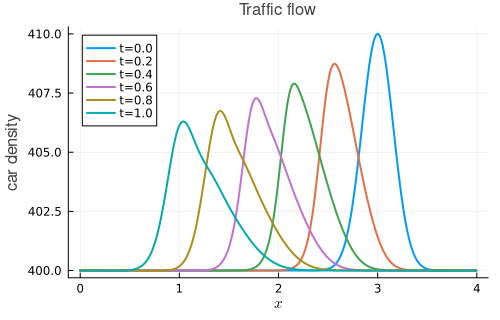

In [6]:
plt = plot(
    legend=:topleft, 
    title="Traffic flow",
    xaxis=(L"x"),  yaxis=("car density"))
for t in 0:0.2:1
    plot!(x, sol(t), label=@sprintf("t=%.1f", t))
end
plt

The bump slowly moves backward on the roadway, spreading out and gradually fading away due to the presence of diffusion.

In [7]:
anim = @animate for t in range(0,0.9,91) 
    plot(x, sol(t);
        xaxis=(L"x"),  yaxis=([400,410], "density"),
        dpi=150,  title=@sprintf("Traffic flow, t=%.2f",t))
end
mp4(anim, "traffic-fade.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/traffic-fade.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/traffic-fade.mp4")

Now we use an initial condition with a larger bump. Note that the scale on the $y$-axis is much different for this solution.

In [8]:
ρ_init = @. 400 + 80 * exp( -16*(x - 3)^2 )
IVP = ODEProblem(ode, ρ_init, (0., 0.5), 0.02)
sol = solve(IVP, Rodas4P());

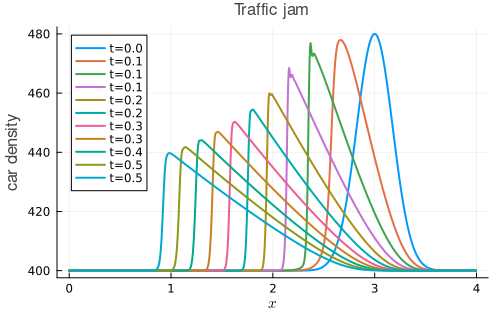

In [9]:
plt = plot(
    legend=:topleft,
    title="Traffic jam",
    xaxis=(L"x"),  yaxis=("car density"))
for t in range(0, 0.5, 11)
    plot!(x, sol(t), label=@sprintf("t=%.1f", t))
end
plt

In [10]:
anim = @animate for t in range(0, 0.5, 101) 
    plot(x, sol(t);
        xaxis=(L"x"),  yaxis=([400,480], "density"),
        dpi=150,  title=@sprintf("Traffic jam, t=%.2f",t))
end
mp4(anim,"traffic-jam.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/traffic-jam.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section1/julia/traffic-jam.mp4")

In this case the density bump travels backward along the road. It also steepens on the side facing the incoming traffic and decreases much more slowly on the other side. A motorist would experience this as an abrupt increase in density, followed by a much more gradual decrease in density and resulting gradual increase in speed. (You also see some transient, high-frequency oscillations. These are caused by instabilities, as we discuss in simpler situations later in this chapter.)